In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### Limpieza y manipulacion

Exportar cada tabla y limpiarla para dejar solo un valor por distrito en el año 2022 y quitar las columnas de tiempo(date, year, month,...)

In [ ]:
padron = pd.read_csv('tablas/padron_12_22.csv') # La primera fila es el nombre de las columnas que son los años
padron

,distrito,nacionales,extranjeros,total,date,month,year
0,arganzuela,135269,16783,152052.0,2014-01-01,1,2014
1,barajas,41213,4508,45721.0,2014-01-01,1,2014
2,carabanchel,201419,42154,243573.0,2014-01-01,1,2014
3,centro,104359,30578,134937.0,2014-01-01,1,2014
4,chamartin,129404,13720,143124.0,2014-01-01,1,2014
...,...,...,...,...,...,...,...
2371,usera,106703,36096,142799.0,2022-12-01,12,2022
2372,vicalvaro,71508,11990,83498.0,2022-12-01,12,2022
2373,villaverde,121514,37399,158913.0,2022-12-01,12,2022
2374,villa_vallecas,99127,18265,117392.0,2022-12-01,12,2022


In [ ]:
# Pasar la columna 'date' a datetime
padron['date'] = pd.to_datetime(padron['date'])

# Filtrar las filas correspondientes al año 2022 para cada distrito
padron_2022 = padron.loc[(padron['date'].dt.month == 12) & (padron['year'] == 2022)]

# Reindexar el DataFrame
padron_2022.reset_index(drop=True, inplace=True)

# Imprimir el DataFrame resultante
padron_2022

,distrito,nacionales,extranjeros,total,date,month,year
0,arganzuela,136621,17111,153732.0,2022-12-01,12,2022
1,barajas,43591,5137,48728.0,2022-12-01,12,2022
2,carabanchel,201028,61320,262348.0,2022-12-01,12,2022
3,centro,101458,38466,139924.0,2022-12-01,12,2022
4,chamartin,129218,15812,145030.0,2022-12-01,12,2022
5,chamberi,119669,18989,138658.0,2022-12-01,12,2022
6,ciudad_lineal,182564,37399,219963.0,2022-12-01,12,2022
7,fuencarral,224519,24234,248753.0,2022-12-01,12,2022
8,hortaleza,174129,24348,198477.0,2022-12-01,12,2022
9,latina,196054,45684,241738.0,2022-12-01,12,2022


In [ ]:
# Eliminar columnas que no necesitamos
padron_2022 = padron_2022.drop(['nacionales','extranjeros', 'date', 'month', 'year'], axis=1)

# Imprimir el DataFrame resultante
padron_2022

,distrito,total
0,arganzuela,153732.0
1,barajas,48728.0
2,carabanchel,262348.0
3,centro,139924.0
4,chamartin,145030.0
5,chamberi,138658.0
6,ciudad_lineal,219963.0
7,fuencarral,248753.0
8,hortaleza,198477.0
9,latina,241738.0


In [ ]:
ventas = pd.read_csv('tablas/ventas_01_23.csv')
ventas

,date,precio_m2,var_mensual,var_trimest,var_anual,distrito,month,year
0,2023-06-01,4015,0.9,2.0,5.1,madrid,6,2023
1,2023-05-01,3979,0.1,2.0,4.9,madrid,5,2023
2,2023-04-01,3977,1.1,2.8,5.6,madrid,4,2023
3,2023-03-01,3935,0.9,1.4,5.2,madrid,3,2023
4,2023-02-01,3900,0.8,0.4,4.5,madrid,2,2023
...,...,...,...,...,...,...,...,...
3121,2001-05-01,1592,0.0,0.0,0.0,0,5,2001
3122,2001-04-01,1592,0.0,0.0,0.0,0,4,2001
3123,2001-03-01,1542,0.0,0.0,0.0,0,3,2001
3124,2001-02-01,1542,0.0,0.0,0.0,0,2,2001


In [ ]:
# Convertir la columna 'date' a formato de fecha
ventas['date'] = pd.to_datetime(ventas['date'])

# Filtrar las filas correspondientes al mes de diciembre de 2022
ventas_2022 = ventas.loc[(ventas['date'].dt.month == 12) & (ventas['year'] == 2022)]

# Reindexar el DataFrame
ventas_2022.reset_index(drop=True, inplace=True)

# Imprimir el DataFrame resultante
ventas_2022

,date,precio_m2,var_mensual,var_trimest,var_anual,distrito,month,year
0,2022-12-01,3881,0.9,0.8,6.3,madrid,12,2022
1,2022-12-01,4331,0.0,1.5,6.1,arganzuela,12,2022
2,2022-12-01,3394,1.5,3.3,1.1,barajas,12,2022
3,2022-12-01,2366,0.4,1.1,9.8,carabanchel,12,2022
4,2022-12-01,5101,0.7,0.3,5.7,centro,12,2022
5,2022-12-01,5577,0.8,1.2,9.5,chamartin,12,2022
6,2022-12-01,5818,0.0,0.4,7.8,chamberi,12,2022
7,2022-12-01,3260,0.7,1.2,9.2,ciudad_lineal,12,2022
8,2022-12-01,3808,0.7,1.0,5.0,fuencarral,12,2022
9,2022-12-01,3850,1.4,2.0,1.6,hortaleza,12,2022


In [ ]:
# Eliminar columnas que no necesitamos
ventas_2022 = ventas_2022.drop(['var_mensual', 'var_trimest', 'var_anual', 'date', 'month', 'year'], axis=1)

# Imprimir el DataFrame resultante
ventas_2022

,precio_m2,distrito
0,3881,madrid
1,4331,arganzuela
2,3394,barajas
3,2366,carabanchel
4,5101,centro
5,5577,chamartin
6,5818,chamberi
7,3260,ciudad_lineal
8,3808,fuencarral
9,3850,hortaleza


In [ ]:
demografico = pd.read_csv('tablas/demograficos_16_22.csv') # La primera fila es el nombre de las columnas que son los años
demografico

,date,year,distrito,paro,cdv,seguridad,zverde
0,01/01/16,2016,madrid,197753.0,66.40,65.70,6029.87
1,01/01/17,2017,madrid,182379.0,69.50,66.35,6219.20
2,01/01/18,2018,madrid,167871.0,69.50,68.50,6021.40
3,01/01/19,2019,madrid,167188.0,71.30,68.10,5823.60
4,01/01/20,2020,madrid,192241.0,71.65,68.10,6031.44
...,...,...,...,...,...,...,...
149,01/01/18,2018,barajas,1744.0,79.00,74.45,272.84
150,01/01/19,2019,barajas,1894.0,80.90,74.60,266.70
151,01/01/20,2020,barajas,2213.0,79.45,74.60,304.30
152,01/01/21,2021,barajas,2532.0,78.00,74.60,304.30


In [ ]:
# Convertir la columna 'date' a formato de fecha
demografico['date'] = pd.to_datetime(demografico['date'])

# Filtrar las filas correspondientes al mes de diciembre de 2022
demografico_2022 = demografico.loc[(demografico['year'] == 2022)]

# Reindexar el DataFrame
demografico_2022.reset_index(drop=True, inplace=True)

# Imprimir el DataFrame resultante
demografico_2022

,date,year,distrito,paro,cdv,seguridad,zverde
0,2022-01-01,2022,madrid,160316.0,70.06,74.5,6031.44
1,2022-01-01,2022,centro,7299.0,70.07,77.0,45.24
2,2022-01-01,2022,arganzuela,6188.0,75.04,77.5,131.49
3,2022-01-01,2022,retiro,3800.0,78.88,81.0,150.31
4,2022-01-01,2022,salamanca,4388.0,78.24,84.0,43.40
5,2022-01-01,2022,chamartin,4296.0,78.48,82.5,55.10
6,2022-01-01,2022,tetuan,7623.0,66.31,73.0,63.30
7,2022-01-01,2022,chamberi,4318.0,77.40,83.5,10.90
8,2022-01-01,2022,fuencarral,8500.0,74.87,81.0,376.80
9,2022-01-01,2022,moncloa,3853.0,78.51,82.0,1835.10


In [ ]:
# Eliminar columnas que no necesitamos
demografico_2022 = demografico_2022.drop(['date', 'year'], axis=1)


demografico_2022

,distrito,paro,cdv,seguridad,zverde
0,madrid,160316.0,70.06,74.5,6031.44
1,centro,7299.0,70.07,77.0,45.24
2,arganzuela,6188.0,75.04,77.5,131.49
3,retiro,3800.0,78.88,81.0,150.31
4,salamanca,4388.0,78.24,84.0,43.40
5,chamartin,4296.0,78.48,82.5,55.10
6,tetuan,7623.0,66.31,73.0,63.30
7,chamberi,4318.0,77.40,83.5,10.90
8,fuencarral,8500.0,74.87,81.0,376.80
9,moncloa,3853.0,78.51,82.0,1835.10


In [ ]:
renta = pd.read_csv('tablas/renta_02_22.csv') # La primera fila es el nombre de las columnas que son los años
renta

,Unnamed: 0,date,distrito,valor,year
0,0,2002-01-01,madrid,15044,2002
1,1,2003-01-01,madrid,15916,2003
2,2,2004-01-01,madrid,16827,2004
3,3,2005-01-01,madrid,17439,2005
4,4,2006-01-01,madrid,18772,2006
...,...,...,...,...,...
457,457,2018-01-01,barajas,25775,2018
458,458,2019-01-01,barajas,26467,2019
459,459,2020-01-01,barajas,27635,2020
460,460,2021-01-01,barajas,28186,2021


In [ ]:
# Convertir la columna 'date' a formato de fecha
renta['date'] = pd.to_datetime(renta['date'])

# Filtrar las filas correspondientes al mes de diciembre de 2022
renta_2022 = renta.loc[(renta['year'] == 2022)]

# Reindexar el DataFrame
renta_2022.reset_index(drop=True, inplace=True)

# Imprimir el DataFrame resultante
renta_2022

,Unnamed: 0,date,distrito,valor,year
0,20,2022-01-01,madrid,24405,2022
1,41,2022-01-01,centro,28350,2022
2,62,2022-01-01,arganzuela,28454,2022
3,83,2022-01-01,retiro,31242,2022
4,104,2022-01-01,salamanca,31170,2022
5,125,2022-01-01,chamartin,31101,2022
6,146,2022-01-01,tetuan,23583,2022
7,167,2022-01-01,chamberi,30994,2022
8,188,2022-01-01,fuencarral,25983,2022
9,209,2022-01-01,moncloa,28998,2022


In [ ]:
# Eliminar columnas que no necesitamos
renta_2022 = renta_2022.drop(['Unnamed: 0', 'date', 'year'], axis=1)

renta_2022

,distrito,valor
0,madrid,24405
1,centro,28350
2,arganzuela,28454
3,retiro,31242
4,salamanca,31170
5,chamartin,31101
6,tetuan,23583
7,chamberi,30994
8,fuencarral,25983
9,moncloa,28998


In [ ]:
alquiler = pd.read_csv('tablas/alquiler_12_23.csv')
alquiler

,date,precio_m2,var_mensual,var_trimest,var_anual,distrito,month,year
0,2023-06-01,16.8,1.2,3.7,10.2,madrid,6,2023
1,2023-05-01,16.6,1.2,2.6,11.0,madrid,5,2023
2,2023-04-01,16.4,1.2,2.5,10.3,madrid,4,2023
3,2023-03-01,16.2,0.2,2.7,10.4,madrid,3,2023
4,2023-02-01,16.2,1.1,2.5,11.2,madrid,2,2023
...,...,...,...,...,...,...,...,...
2987,2012-07-01,8.5,1.1,1.3,5.6,villaverde,7,2012
2988,2012-06-01,8.5,0.8,1.9,4.8,villaverde,6,2012
2989,2012-05-01,8.5,0.9,2.4,5.7,villaverde,5,2012
2990,2012-04-01,8.6,1.8,2.0,7.9,villaverde,4,2012


In [ ]:
# Convertir la columna 'date' a formato de fecha
alquiler['date'] = pd.to_datetime(alquiler['date'])

# Filtrar las filas correspondientes al mes de diciembre de 2022
alquiler_2022 = alquiler.loc[(alquiler['date'].dt.month == 12) & (alquiler['year'] == 2022)]

# Reindexar el DataFrame
alquiler_2022.reset_index(drop=True, inplace=True)

# Imprimir el DataFrame resultante
alquiler_2022

,date,precio_m2,var_mensual,var_trimest,var_anual,distrito,month,year
0,2022-12-01,15.8,0.0,1.0,10.8,madrid,12,2022
1,2022-12-01,16.0,0.3,3.3,10.1,arganzuela,12,2022
2,2022-12-01,12.5,0.6,4.2,7.4,barajas,12,2022
3,2022-12-01,12.6,0.7,1.0,8.6,carabanchel,12,2022
4,2022-12-01,19.5,2.3,5.2,13.9,centro,12,2022
5,2022-12-01,16.7,0.0,0.2,8.7,chamartin,12,2022
6,2022-12-01,19.2,2.0,6.2,12.7,chamberi,12,2022
7,2022-12-01,14.2,1.3,2.9,10.5,ciudad_lineal,12,2022
8,2022-12-01,13.1,0.0,1.7,6.6,fuencarral,12,2022
9,2022-12-01,13.4,0.7,1.8,7.6,hortaleza,12,2022


In [ ]:
# Eliminar columnas que no necesitamos
alquiler_2022 = alquiler_2022.drop(['var_mensual', 'var_trimest', 'var_anual', 'date', 'month', 'year'], axis=1)

alquiler_2022

,precio_m2,distrito
0,15.8,madrid
1,16.0,arganzuela
2,12.5,barajas
3,12.6,carabanchel
4,19.5,centro
5,16.7,chamartin
6,19.2,chamberi
7,14.2,ciudad_lineal
8,13.1,fuencarral
9,13.4,hortaleza


### Convinacion de todas las tablas en una

In [ ]:
# Combina las tablas por la columna "distrito"
combinada = alquiler_2022.merge(renta_2022, on='distrito', suffixes=('_alquiler', '_renta')) \
                            .merge(demografico_2022, on='distrito') \
                            .merge(ventas_2022, on='distrito', suffixes=('_alquiler', '_ventas')) \
                            .merge(padron_2022, on='distrito', suffixes=('_ventas', '_padron'))

# Imprimir el DataFrame resultante
combinada

,precio_m2_alquiler,distrito,valor,paro,cdv,seguridad,zverde,precio_m2_ventas,total
0,15.8,madrid,24405,160316.0,70.06,74.5,6031.44,3881,3342035.0
1,16.0,arganzuela,28454,6188.0,75.04,77.5,131.49,4331,153732.0
2,12.5,barajas,28738,1771.0,77.32,81.5,304.30,3394,48728.0
3,12.6,carabanchel,19560,15541.0,63.70,66.5,245.10,2366,262348.0
4,19.5,centro,28350,7299.0,70.07,77.0,45.24,5101,139924.0
5,16.7,chamartin,31101,4296.0,78.48,82.5,55.10,5577,145030.0
6,19.2,chamberi,30994,4318.0,77.40,83.5,10.90,5818,138658.0
7,14.2,ciudad_lineal,23837,9969.0,69.39,74.0,135.30,3260,219963.0
8,13.1,fuencarral,25983,8500.0,74.87,81.0,376.80,3808,248753.0
9,13.4,hortaleza,26677,7710.0,73.29,78.5,732.70,3850,198477.0


In [ ]:
combinada.rename(columns={'total': 'padron_total','valor':'renta_per'}, inplace=True)

In [ ]:
combinada

,precio_m2_alquiler,distrito,renta_per,paro,cdv,seguridad,zverde,precio_m2_ventas,padron_total
0,15.8,madrid,24405,160316.0,70.06,74.5,6031.44,3881,3342035.0
1,16.0,arganzuela,28454,6188.0,75.04,77.5,131.49,4331,153732.0
2,12.5,barajas,28738,1771.0,77.32,81.5,304.30,3394,48728.0
3,12.6,carabanchel,19560,15541.0,63.70,66.5,245.10,2366,262348.0
4,19.5,centro,28350,7299.0,70.07,77.0,45.24,5101,139924.0
5,16.7,chamartin,31101,4296.0,78.48,82.5,55.10,5577,145030.0
6,19.2,chamberi,30994,4318.0,77.40,83.5,10.90,5818,138658.0
7,14.2,ciudad_lineal,23837,9969.0,69.39,74.0,135.30,3260,219963.0
8,13.1,fuencarral,25983,8500.0,74.87,81.0,376.80,3808,248753.0
9,13.4,hortaleza,26677,7710.0,73.29,78.5,732.70,3850,198477.0


In [ ]:

combinada['porcentaje_paro'] = (combinada['paro'] / combinada['padron_total']) * 100
combinada['porcentaje_paro'] = combinada['porcentaje_paro'].round(1)
# No tenemos los datos de la poblacion activa pero hemos creado una aproximacion para crear el porcentaje de paro con el padron total

In [ ]:
combinada

,precio_m2_alquiler,distrito,renta_per,paro,cdv,seguridad,zverde,precio_m2_ventas,padron_total,porcentaje_paro
0,15.8,madrid,24405,160316.0,70.06,74.5,6031.44,3881,3342035.0,4.8
1,16.0,arganzuela,28454,6188.0,75.04,77.5,131.49,4331,153732.0,4.0
2,12.5,barajas,28738,1771.0,77.32,81.5,304.30,3394,48728.0,3.6
3,12.6,carabanchel,19560,15541.0,63.70,66.5,245.10,2366,262348.0,5.9
4,19.5,centro,28350,7299.0,70.07,77.0,45.24,5101,139924.0,5.2
5,16.7,chamartin,31101,4296.0,78.48,82.5,55.10,5577,145030.0,3.0
6,19.2,chamberi,30994,4318.0,77.40,83.5,10.90,5818,138658.0,3.1
7,14.2,ciudad_lineal,23837,9969.0,69.39,74.0,135.30,3260,219963.0,4.5
8,13.1,fuencarral,25983,8500.0,74.87,81.0,376.80,3808,248753.0,3.4
9,13.4,hortaleza,26677,7710.0,73.29,78.5,732.70,3850,198477.0,3.9


In [ ]:
# Eliminar columna paro
combinada = combinada.drop(['paro'], axis=1)

In [ ]:

# Eliminar la fila donde el distrito es "madrid"
combinada = combinada.drop(combinada[combinada['distrito'] == 'madrid'].index)

# Reiniciar el índice del DataFrame después de eliminar la fila
combinada.reset_index(drop=True, inplace=True)

# Imprimir el DataFrame resultante
combinada

,precio_m2_alquiler,distrito,renta_per,cdv,seguridad,zverde,precio_m2_ventas,padron_total,porcentaje_paro
0,16.0,arganzuela,28454,75.04,77.5,131.49,4331,153732.0,4.0
1,12.5,barajas,28738,77.32,81.5,304.30,3394,48728.0,3.6
2,12.6,carabanchel,19560,63.70,66.5,245.10,2366,262348.0,5.9
3,19.5,centro,28350,70.07,77.0,45.24,5101,139924.0,5.2
4,16.7,chamartin,31101,78.48,82.5,55.10,5577,145030.0,3.0
5,19.2,chamberi,30994,77.40,83.5,10.90,5818,138658.0,3.1
6,14.2,ciudad_lineal,23837,69.39,74.0,135.30,3260,219963.0,4.5
7,13.1,fuencarral,25983,74.87,81.0,376.80,3808,248753.0,3.4
8,13.4,hortaleza,26677,73.29,78.5,732.70,3850,198477.0,3.9
9,12.9,latina,21331,68.30,71.0,290.40,2477,241738.0,5.4


In [ ]:
# Hacer una copia del DataFrame combinado
combinada_scaler = combinada.copy()

# Imprimir el DataFrame copiado
combinada_scaler

,precio_m2_alquiler,distrito,renta_per,cdv,seguridad,zverde,precio_m2_ventas,padron_total,porcentaje_paro
0,16.0,arganzuela,28454,75.04,77.5,131.49,4331,153732.0,4.0
1,12.5,barajas,28738,77.32,81.5,304.30,3394,48728.0,3.6
2,12.6,carabanchel,19560,63.70,66.5,245.10,2366,262348.0,5.9
3,19.5,centro,28350,70.07,77.0,45.24,5101,139924.0,5.2
4,16.7,chamartin,31101,78.48,82.5,55.10,5577,145030.0,3.0
5,19.2,chamberi,30994,77.40,83.5,10.90,5818,138658.0,3.1
6,14.2,ciudad_lineal,23837,69.39,74.0,135.30,3260,219963.0,4.5
7,13.1,fuencarral,25983,74.87,81.0,376.80,3808,248753.0,3.4
8,13.4,hortaleza,26677,73.29,78.5,732.70,3850,198477.0,3.9
9,12.9,latina,21331,68.30,71.0,290.40,2477,241738.0,5.4


### Normalizacion

In [ ]:
# Crea una instancia del normalizador Min-Max
scaler = MinMaxScaler()

# Selecciona las columnas que deseas normalizar (excluyendo la columna objetivo si la tienes)
cols_to_scale = ['precio_m2_alquiler', 'renta_per', 'cdv', 'seguridad', 'zverde',
                 'precio_m2_ventas', 'padron_total']

# Aplica la normalización Min-Max a las columnas seleccionadas
combinada_scaler[cols_to_scale] = scaler.fit_transform(combinada_scaler[cols_to_scale])

# Visualiza el DataFrame resultante con los datos normalizados
combinada_scaler

,precio_m2_alquiler,distrito,renta_per,cdv,seguridad,zverde,precio_m2_ventas,padron_total,porcentaje_paro
0,0.578313,arganzuela,0.790218,0.830986,0.723404,0.066106,0.542951,0.491546,4.0
1,0.156627,barajas,0.811588,0.931338,0.893617,0.160838,0.338142,0.000000,3.6
2,0.168675,carabanchel,0.120993,0.331866,0.255319,0.128385,0.113443,1.000000,5.9
3,1.000000,centro,0.782393,0.612236,0.702128,0.018825,0.711257,0.426908,5.2
4,0.662651,chamartin,0.989391,0.982394,0.936170,0.024230,0.815301,0.450810,3.0
5,0.963855,chamberi,0.981339,0.934859,0.978723,0.000000,0.867978,0.420981,3.1
6,0.361446,ciudad_lineal,0.442814,0.582306,0.574468,0.068194,0.308852,0.801587,4.5
7,0.228916,fuencarral,0.604289,0.823504,0.872340,0.200581,0.428634,0.936359,3.4
8,0.265060,hortaleza,0.656509,0.753961,0.765957,0.395680,0.437814,0.701006,3.9
9,0.204819,latina,0.254251,0.534331,0.446809,0.153218,0.137705,0.903520,5.4


In [ ]:
# Eliminar la columna 'distrito'
combinada_scaler.drop('distrito', axis=1, inplace=True)

# Imprimir el DataFrame resultante
combinada_scaler

,precio_m2_alquiler,renta_per,cdv,seguridad,zverde,precio_m2_ventas,padron_total,porcentaje_paro
0,0.578313,0.790218,0.830986,0.723404,0.066106,0.542951,0.491546,4.0
1,0.156627,0.811588,0.931338,0.893617,0.160838,0.338142,0.000000,3.6
2,0.168675,0.120993,0.331866,0.255319,0.128385,0.113443,1.000000,5.9
3,1.000000,0.782393,0.612236,0.702128,0.018825,0.711257,0.426908,5.2
4,0.662651,0.989391,0.982394,0.936170,0.024230,0.815301,0.450810,3.0
5,0.963855,0.981339,0.934859,0.978723,0.000000,0.867978,0.420981,3.1
6,0.361446,0.442814,0.582306,0.574468,0.068194,0.308852,0.801587,4.5
7,0.228916,0.604289,0.823504,0.872340,0.200581,0.428634,0.936359,3.4
8,0.265060,0.656509,0.753961,0.765957,0.395680,0.437814,0.701006,3.9
9,0.204819,0.254251,0.534331,0.446809,0.153218,0.137705,0.903520,5.4


### Aplicar un Clustering

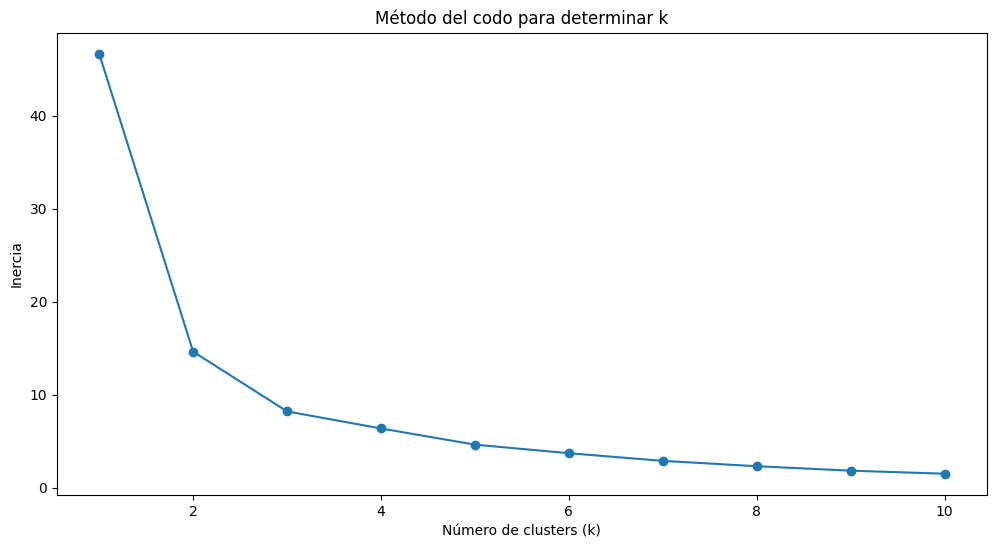

In [ ]:
# Aplicar el algoritmo K-means
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(combinada_scaler)
    inertias.append(kmeans.inertia_)

# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar k')
plt.show()

In [ ]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(combinada_scaler[combinada_scaler.columns])
combinada_scaler['clusters'] = clusters
combinada_scaler

,precio_m2_alquiler,renta_per,cdv,seguridad,zverde,precio_m2_ventas,padron_total,porcentaje_paro,clusters
0,0.578313,0.790218,0.830986,0.723404,0.066106,0.542951,0.491546,4.0,1
1,0.156627,0.811588,0.931338,0.893617,0.160838,0.338142,0.000000,3.6,1
2,0.168675,0.120993,0.331866,0.255319,0.128385,0.113443,1.000000,5.9,0
3,1.000000,0.782393,0.612236,0.702128,0.018825,0.711257,0.426908,5.2,3
4,0.662651,0.989391,0.982394,0.936170,0.024230,0.815301,0.450810,3.0,2
5,0.963855,0.981339,0.934859,0.978723,0.000000,0.867978,0.420981,3.1,2
6,0.361446,0.442814,0.582306,0.574468,0.068194,0.308852,0.801587,4.5,3
7,0.228916,0.604289,0.823504,0.872340,0.200581,0.428634,0.936359,3.4,1
8,0.265060,0.656509,0.753961,0.765957,0.395680,0.437814,0.701006,3.9,1
9,0.204819,0.254251,0.534331,0.446809,0.153218,0.137705,0.903520,5.4,3


In [ ]:
# Extraer la columna "cluster" del DataFrame "combinada_scaler"
cluster_column = combinada_scaler['clusters']

# Insertar la columna "cluster" en el DataFrame "combinada" como la última columna
combinada.insert(combinada.shape[1], 'clusters', cluster_column)

# Imprimir el DataFrame resultante
combinada

,precio_m2_alquiler,distrito,renta_per,cdv,seguridad,zverde,precio_m2_ventas,padron_total,porcentaje_paro,clusters
0,16.0,arganzuela,28454,75.04,77.5,131.49,4331,153732.0,4.0,1
1,12.5,barajas,28738,77.32,81.5,304.30,3394,48728.0,3.6,1
2,12.6,carabanchel,19560,63.70,66.5,245.10,2366,262348.0,5.9,0
3,19.5,centro,28350,70.07,77.0,45.24,5101,139924.0,5.2,3
4,16.7,chamartin,31101,78.48,82.5,55.10,5577,145030.0,3.0,2
5,19.2,chamberi,30994,77.40,83.5,10.90,5818,138658.0,3.1,2
6,14.2,ciudad_lineal,23837,69.39,74.0,135.30,3260,219963.0,4.5,3
7,13.1,fuencarral,25983,74.87,81.0,376.80,3808,248753.0,3.4,1
8,13.4,hortaleza,26677,73.29,78.5,732.70,3850,198477.0,3.9,1
9,12.9,latina,21331,68.30,71.0,290.40,2477,241738.0,5.4,3


In [ ]:
# Eliminar la columna distrito
combined_dropped = combinada.drop(columns=['distrito'])

# Hacer un groupby con los clusters con la media de cada columna
grouped_df = combined_dropped.groupby('clusters').mean()

# Visualizar el df
grouped_df

,precio_m2_alquiler,renta_per,cdv,seguridad,zverde,precio_m2_ventas,padron_total,porcentaje_paro
clusters,,,,,,,,
0,12.380,19251.200000,61.598000,65.800000,259.080000,2210.000000,184537.60,6.420000
1,14.040,27770.000000,75.806000,80.100000,676.078000,3934.000000,154342.80,3.620000
2,18.075,31126.750000,78.250000,82.750000,64.927500,5705.250000,136976.75,3.075000
3,14.100,23533.714286,69.137143,74.357143,156.562857,3301.142857,157103.00,5.114286


In [ ]:
excel_file = "/Users/Paco/Desktop/tablas_sql/Tablas_limpias/media_cluster.xlsx"
grouped_df.to_excel(excel_file, index=False)

### Visualizacion

In [ ]:
fig = px.scatter_3d(combinada_scaler, x='seguridad', y='precio_m2_alquiler', z='porcentaje_paro', color ='clusters')
fig.update_layout(
    autosize=False,
    width=1000,

    height=800)
fig.show()

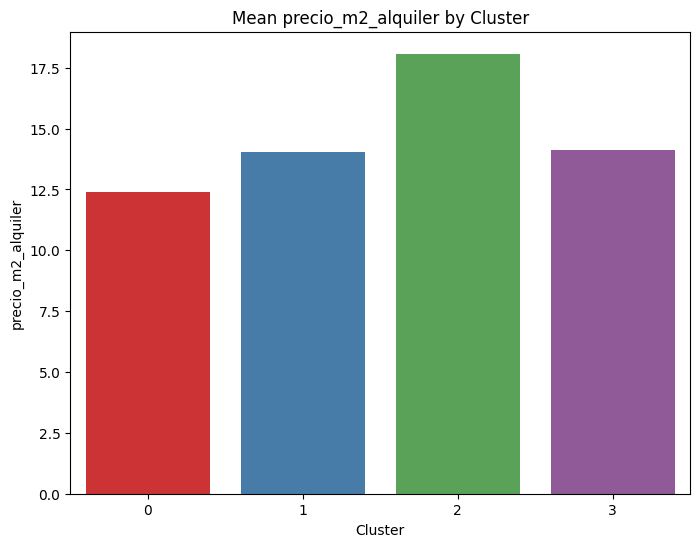

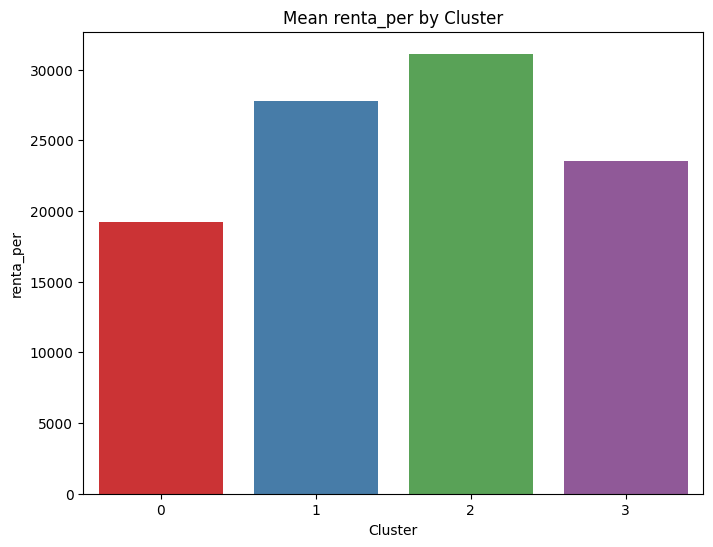

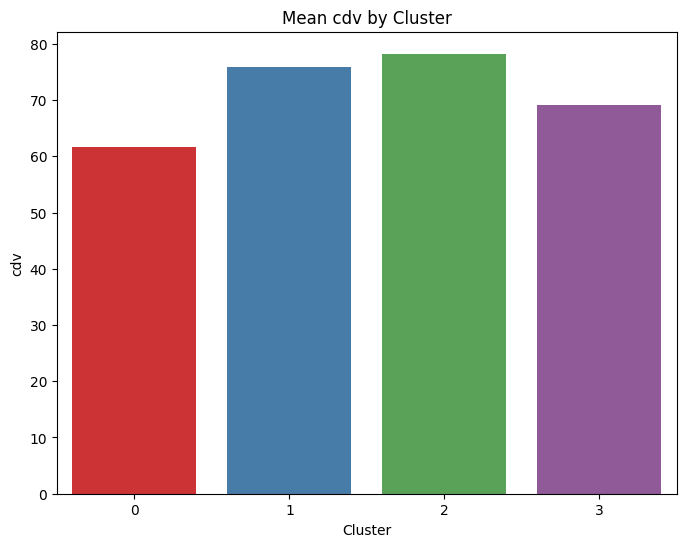

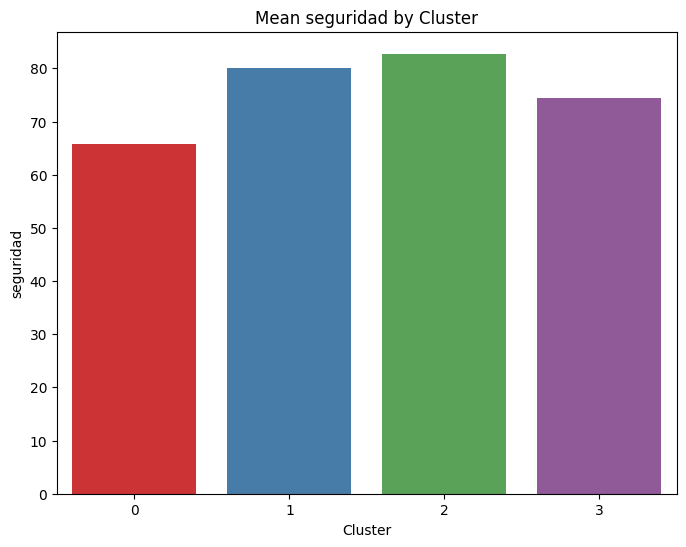

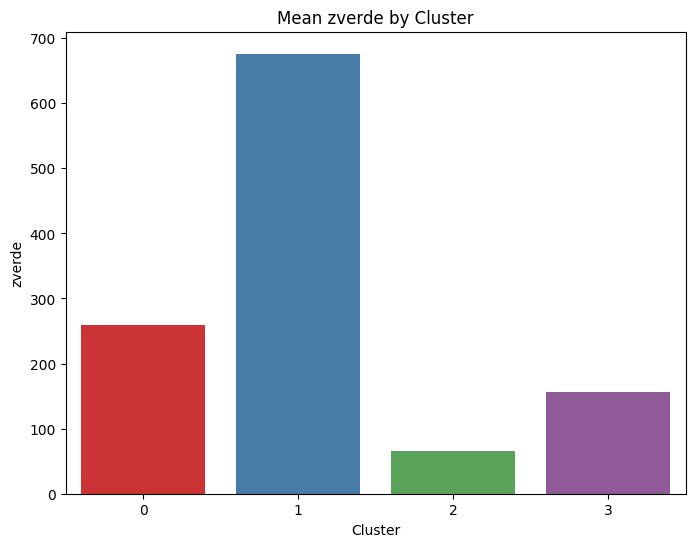

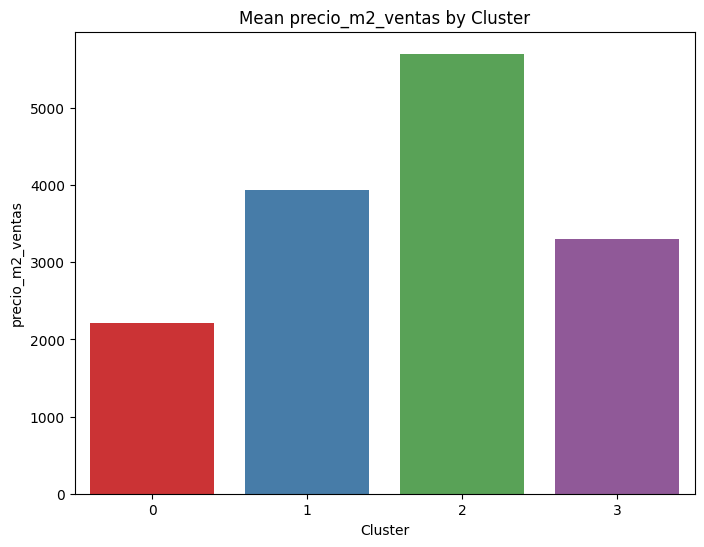

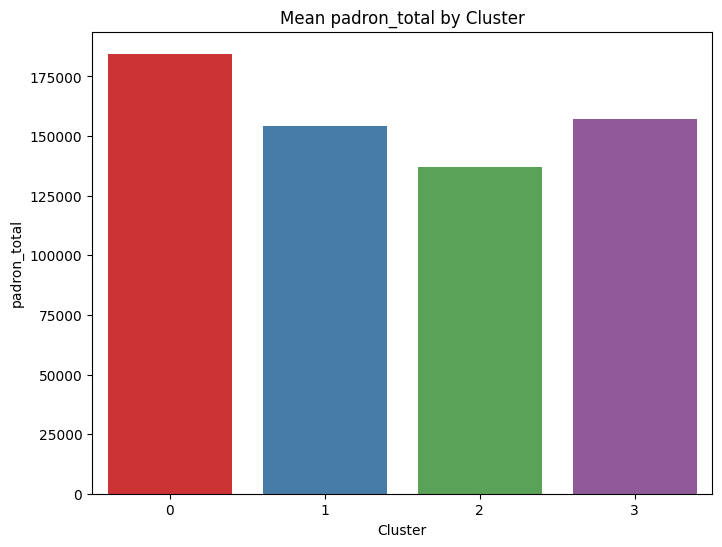

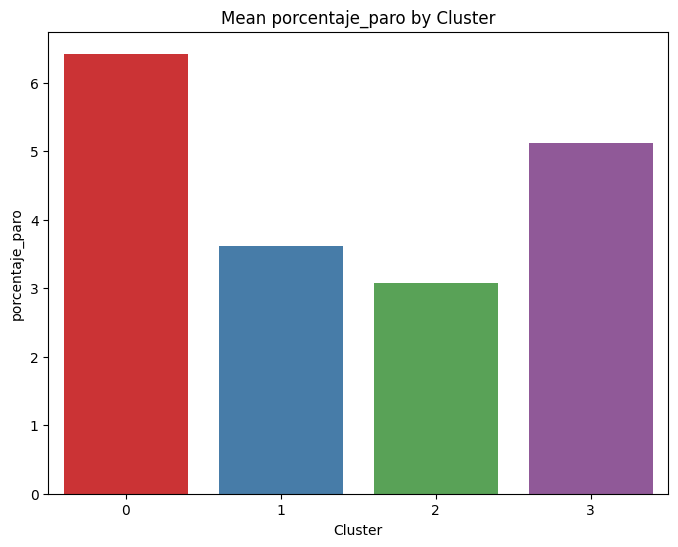

In [ ]:
# Crear un bucle para visualizar cada una de las variables y entender cada cluster
for column in grouped_df.columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(data=grouped_df, x=grouped_df.index, y=column, palette='Set1')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.title(f'Mean {column} by Cluster')
    plt.show()

In [ ]:
# Definir el rango personalizado para la normalización
min_value = 0.1
max_value = 0.9

# Aplicar Min-Max Scaling con el rango personalizado y sumarle 0.5
grouped_df_normalized = min_value + (grouped_df - grouped_df.min()) * (max_value - min_value) / (grouped_df.max() - grouped_df.min())
grouped_df_normalized += 0.5

grouped_df_normalized

,precio_m2_alquiler,renta_per,cdv,seguridad,zverde,precio_m2_ventas,padron_total,porcentaje_paro
clusters,,,,,,,,
0,0.600000,0.600000,0.600000,0.600000,0.854147,0.600000,1.400000,1.400000
1,0.833187,1.173872,1.282585,1.274926,1.400000,0.994593,0.892107,0.730344
2,1.400000,1.400000,1.400000,1.400000,0.600000,1.400000,0.600000,0.600000
3,0.841615,0.888493,0.962198,1.003877,0.719951,0.849743,0.938535,1.087722


In [ ]:
# Agregar la columna "tittles"
grouped_df_normalized['tittles'] = ['Precio Bajo', 'Precios medio-bajo', 'Precio alto', 'Precio medio-alto']

# Mostrar el DataFrame resultante
grouped_df_normalized

,alquiler,renta,calidad de vida,seguridad,zverde,ventas,padron,paro,tittles
clusters,,,,,,,,,
0,0.600000,0.600000,0.600000,0.600000,0.854147,0.600000,1.400000,1.400000,Precio Bajo
1,0.833187,1.173872,1.282585,1.274926,1.400000,0.994593,0.892107,0.730344,Precios medio-bajo
2,1.400000,1.400000,1.400000,1.400000,0.600000,1.400000,0.600000,0.600000,Precio alto
3,0.841615,0.888493,0.962198,1.003877,0.719951,0.849743,0.938535,1.087722,Precio medio-alto


In [ ]:
grouped_df_normalized.rename(columns={'precio_m2_alquiler': 'alquiler','renta_per':'renta','precio_m2_ventas':'ventas','padron_total':'padron','porcentaje_paro':'paro', 'cdv':'calidad de vida'}, inplace=True)

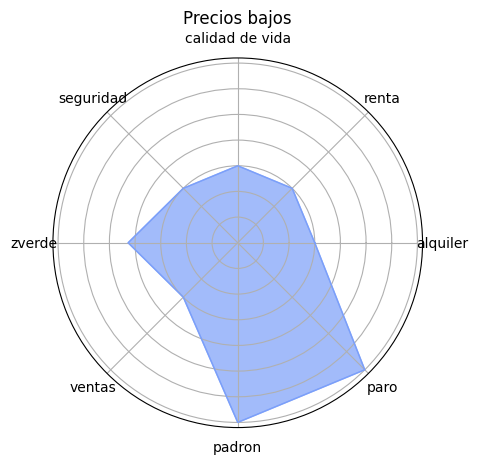

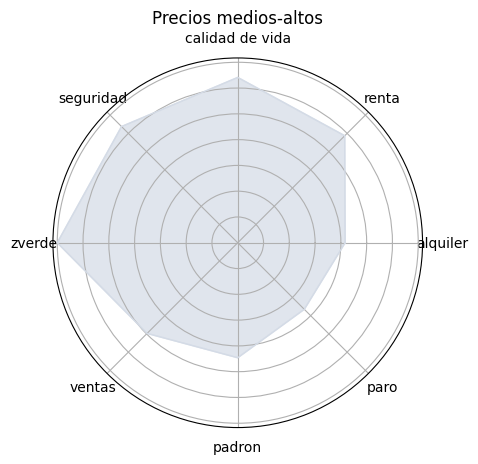

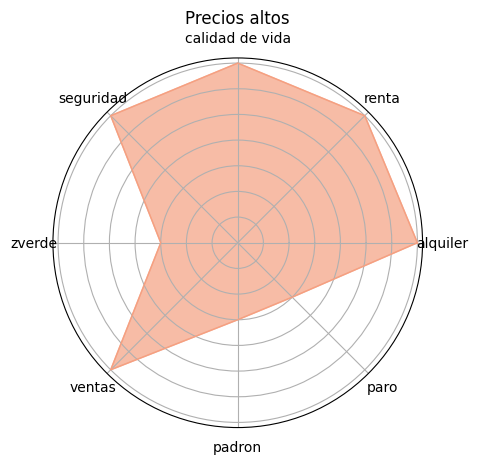

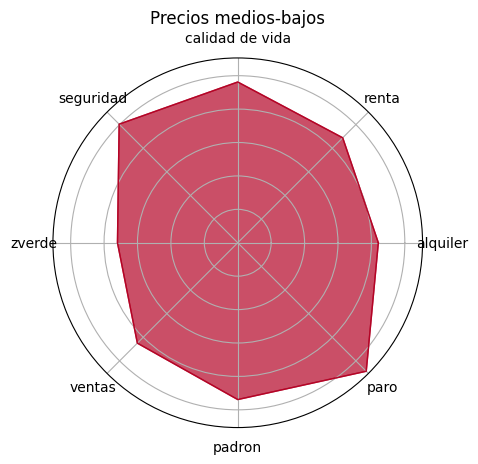

In [ ]:
# Crear una lista de títulos para cada gráfico
titles = ["Precios bajos", "Precios medios-altos", "Precios altos", "Precios medios-bajos"]

# Función para el radar chart
def plot_radar_chart(data, title, color):
    attributes = list(data.index)
    angles = np.linspace(0, 2*np.pi, len(attributes), endpoint=False)
    data = np.concatenate((data, [data[0]]))  # Cerrar el gráfico
    angles = np.concatenate((angles, [angles[0]]))  # Cerrar el gráfico

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    ax.plot(angles, data, linewidth=1, linestyle='solid', label=title, color=color)
    ax.fill(angles, data, alpha=0.7, color=color)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes)  # Etiquetas dentro del círculo
    ax.set_rlabel_position(800)  # Mover las etiquetas del eje radial más hacia afuera

    ax.set_title(title)

    # Eliminar los valores dentro del círculo
    ax.set_yticklabels([])


    plt.show()

# Colores de frío a cálido
cmap = plt.get_cmap("coolwarm")
colors = cmap(np.linspace(0.2, 1.0, len(titles)))

# Crear los gráficos radar para cada cluster
for i, title in enumerate(titles):
    cluster_data = grouped_df_normalized.iloc[i]
    color = colors[i]
    plot_radar_chart(cluster_data, title, color)